All strategies and costs:
       D0  D1  D2  D3  D4  D5  D6  D7  C0  C1  C2  S0  S1  S2  P  R   Cost
0       0   0   0   0   0   0   0   0   0   0   0   0   0   0  0  0   92.0
1       0   0   0   0   0   0   0   0   0   0   0   0   0   0  0  1   98.0
2       0   0   0   0   0   0   0   0   0   0   0   0   0   0  1  0   93.0
3       0   0   0   0   0   0   0   0   0   0   0   0   0   0  1  1   99.0
4       0   0   0   0   0   0   0   0   0   0   0   0   0   1  0  0    inf
...    ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  .. .. ..    ...
65531   1   1   1   1   1   1   1   1   1   1   1   1   1   0  1  1  106.0
65532   1   1   1   1   1   1   1   1   1   1   1   1   1   1  0  0   97.0
65533   1   1   1   1   1   1   1   1   1   1   1   1   1   1  0  1  103.0
65534   1   1   1   1   1   1   1   1   1   1   1   1   1   1  1  0   98.0
65535   1   1   1   1   1   1   1   1   1   1   1   1   1   1  1  1  104.0

[65536 rows x 17 columns]

Top 10 strategies by cost:
       D0  D1  D2  

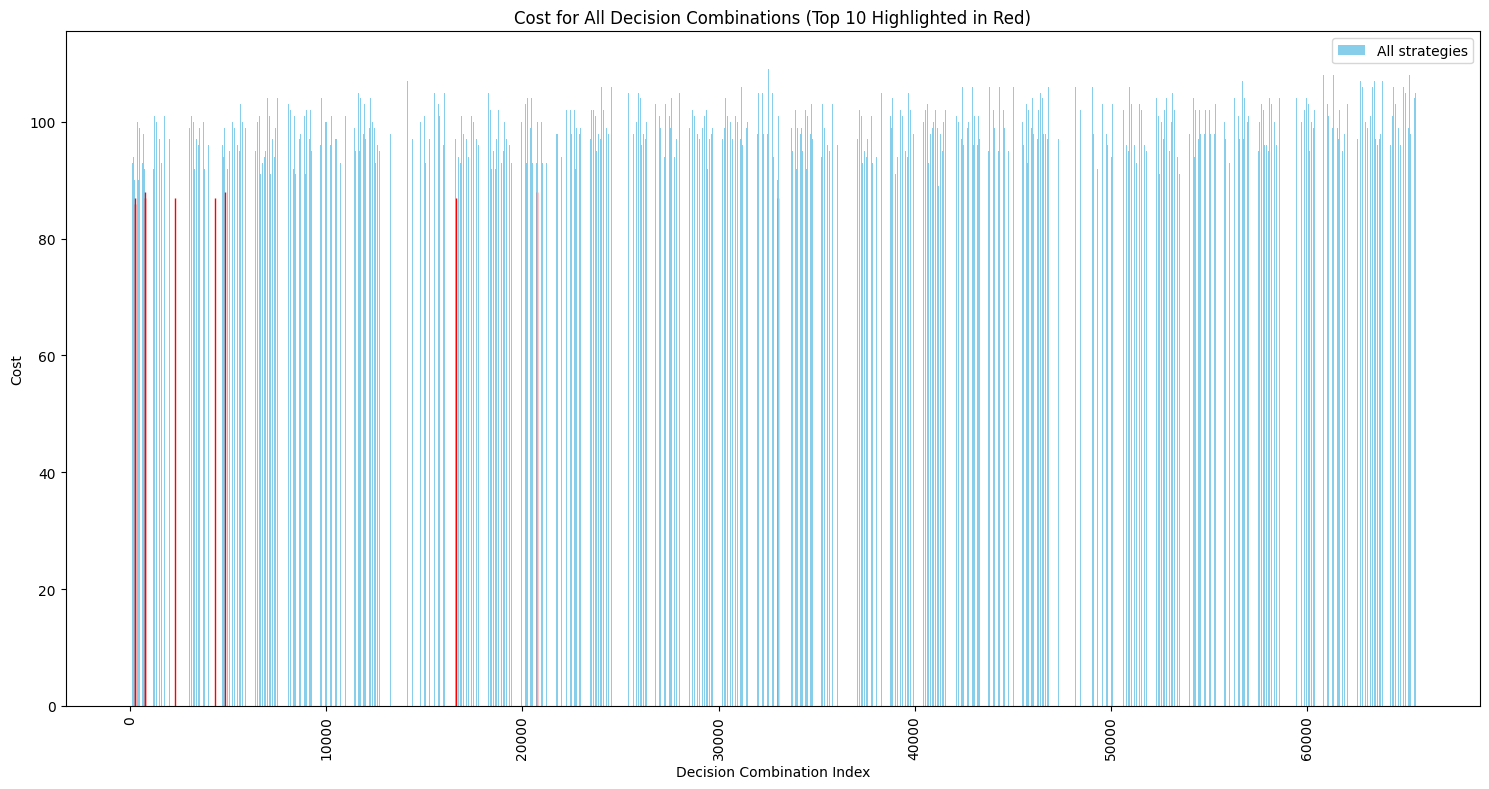

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import itertools
import pandas as pd

# 参数设定
params = {
    'm': 8,  # 零配件数量
    'n': 3,  # 半成品数量
    'p': [0.10, 0.10, 0.10, 0.10, 0.10, 0.10, 0.10, 0.10],  # 零配件次品率
    'c': [2, 8, 12, 2, 8, 12, 8, 12],  # 购买单价
    'd': [1, 1, 2, 1, 1, 2, 1, 2],  # 检测成本
    'a': [8, 8, 8],  # 装配成本
    'af': 0.10,  # 半成品次品率
    'pf': 0.10,  # 成品次品率
    's': 200,  # 市场售价
    'l': 40,  # 调换损失
    'ar': 6,  # 半成品拆解费用
    'r': 10,  # 拆解费用
    'rp': 6  # 正品检测费用 #P
}

# 决策变量
decisions = [0, 1]

# 成本计算函数
def calculate_cost(D, C, S, R, R_prime, params):
    # 零配件成本
    cost_parts = sum(params['c'][i] + params['d'][i] * D[i] for i in range(params['m']))
    
    # 半成品成本，包含装配成本和拆解成本
    cost_subassemblies = 0
    for j in range(params['n']):
        if C[j] == 0 and S[j] == 1:  # 如果没有检测却进行拆解，成本设置为无穷大
            return float('inf')
        if S[j] == 1:  # 如果半成品被拆解
            cost_subassemblies += params['ar']  # 加入拆解费用
        else:
            # 如果检测成本不足，则假定为0
            detection_cost = params['d'][params['m'] + j] if params['m'] + j < len(params['d']) else 0
            cost_subassemblies += params['a'][j] + detection_cost * C[j]  # 正常装配费用
    
    # 次品损失和拆解成本
    cost_rework = params['r'] * R * params['pf']
    loss_replacement = params['l'] * params['pf']
    
    # 正品检测成本
    cost_product_testing = params['rp'] if R_prime == 1 else 0
    
    # 总成本
    total_cost = cost_parts + cost_subassemblies + cost_rework + loss_replacement + cost_product_testing
    return total_cost

# 遍历所有可能的决策组合
costs = []
decision_combinations = list(itertools.product(decisions, repeat=params['m'] + params['n'] + params['n'] + 2))  # 增加正品检测决策维度

# 计算每种组合的成本
for combo in decision_combinations:
    D = combo[:params['m']]
    C = combo[params['m']:params['m'] + params['n']]
    S = combo[params['m'] + params['n']:params['m'] + params['n']*2]  # 拆解决策
    R_prime = combo[-2]  # 正品检测决策
    R = combo[-1]  # 次品拆解决策
    cost = calculate_cost(D, C, S, R_prime, R, params)
    costs.append((combo, cost))

# 将组合和成本转换为DataFrame
columns = [f'D{i}' for i in range(params['m'])] + [f'C{j}' for j in range(params['n'])] + [f'S{j}' for j in range(params['n'])] + ['P', 'R']
df = pd.DataFrame([combo for combo, cost in costs], columns=columns)
df['Cost'] = [cost for combo, cost in costs]

# 打印所有策略
print("All strategies and costs:")
print(df)

# 按成本排序，选出前10种最低成本策略
top_10_strategies = df.sort_values(by='Cost', ascending=True).head(10)

# 打印前10种最低成本策略
print("\nTop 10 strategies by cost:")
print(top_10_strategies)

# 可视化全部策略，红色突出前10种最低成本策略
plt.figure(figsize=(15, 8))

# 所有策略的索引
all_indices = df.index

# 前10种策略的索引
top_10_indices = top_10_strategies.index

# 条形图：显示所有策略
barlist = plt.bar(all_indices, df['Cost'], color='skyblue', label='All strategies')

# 突出前10策略，标记为红色
for i in top_10_indices:
    barlist[i].set_color('red')

# 设置标签和标题
plt.xlabel('Decision Combination Index')
plt.ylabel('Cost')
plt.title('Cost for All Decision Combinations (Top 10 Highlighted in Red)')
plt.xticks(rotation=90)
plt.legend(loc='upper right')  # 使用指定位置的图例，而不是 "best"
plt.tight_layout()

# 展示图形
plt.tight_layout()
plt.show()
